In [2]:
import matplotlib.pyplot as plt
import json
import pandas as pd

# import JSON
with open('ADX_results.json') as json_file:
    results = json.load(json_file)

In [3]:
# Create DataFrame
df = pd.DataFrame(results)

In [4]:
# Drop the QueryString, as this column has no value for the statistical analysis. It was recorded for historization purposes and to make the results traceable
df = df.drop(columns='QueryString')
# Queries that have returned 0 rows might skewers the results, as there is no guarantee, the Query was actually executed. Therefore these results are dropped.
df = df[df.NumberOfRowsReturned != 0]
# Drop Queries for Range 80, as they don't exist for every Amount of RowsInDataBase
df = df[df.QueryType != 'Range, 80']

In [5]:
# Next step is to aggregate the QueryTypes for each Scale
# Before there were 3 Queries, for each Querytype for each Databasesize, for each RowsInDataBase. Now there is only 1 aggregated.
df = df.groupby(['QueryType','DatabaseSize', 'RowsInDataBase','EstimatedMonthlyCosts'], as_index=False).agg(
    {
         'Median': 'median',
         'Mean': 'mean',
         'Maximum': 'max',
         'Minimum': 'min',
    }
)
df

,QueryType,DatabaseSize,RowsInDataBase,EstimatedMonthlyCosts,Median,Mean,Maximum,Minimum
0,Aggregate,Dev(No SLA)_Standard_E2a_v4,1000000,100.63,13.0,14.438333,383.0,11.0
1,Aggregate,Dev(No SLA)_Standard_E2a_v4,10000000,100.63,22.0,24.328000,233.0,20.0
2,Aggregate,Dev(No SLA)_Standard_E2a_v4,100000000,100.63,117.0,117.962667,226.0,110.0
3,Aggregate,Standard_D13_v2,1000000,1077.93,25.0,25.772000,167.0,22.0
4,Aggregate,Standard_D13_v2,10000000,1077.93,32.0,33.013667,153.0,27.0
5,Aggregate,Standard_D13_v2,100000000,1077.93,58.0,60.209333,244.0,52.0
6,Aggregate,Standard_D14_v2,1000000,2155.85,14.0,15.018667,168.0,12.0
7,Aggregate,Standard_D14_v2,10000000,2155.85,33.0,33.974333,131.0,29.0
8,Aggregate,Standard_D14_v2,100000000,2155.85,65.0,66.086667,104.0,54.0
9,Point,Dev(No SLA)_Standard_E2a_v4,1000000,100.63,10.0,11.908667,195.0,8.0


In [6]:
# Get Subsets on which to create Plots
df1 = df.copy(deep=True)
df_index_RowsInDB = df1.set_index('RowsInDataBase', inplace=True)
df_index_RowsInDB = df1.loc[[1000000, 10000000, 100000000], :]
df_Standard_E2a_v4 = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == 'Dev(No SLA)_Standard_E2a_v4']
df_Standard_D13_v2 = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == 'Standard_D13_v2']
df_Standard_D14_v2 = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == 'Standard_D14_v2']


df_index_DBSize = df.set_index('EstimatedMonthlyCosts', inplace=True)
df_index_DBSize = df.loc[[100.63, 1077.93, 2155.85], :]
df_1Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 1000000]
df_10Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 10000000]
df_100Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 100000000]


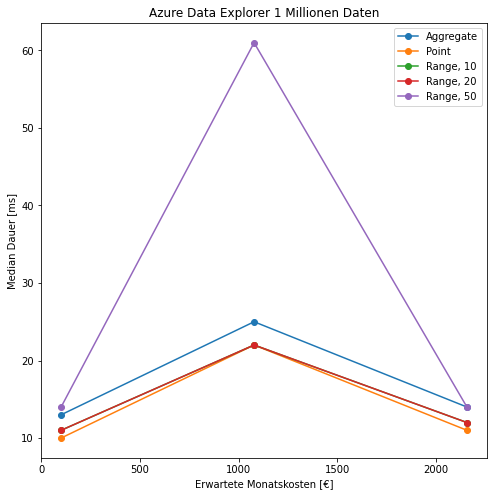

In [7]:
df_1Mil.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Erwartete Monatskosten [€]', ylabel='Median Dauer [ms]', figsize=(8,8), title= 'Azure Data Explorer 1 Millionen Daten')
plt.savefig('./Plots/ADX_1Mil.png', bbox_inches='tight')

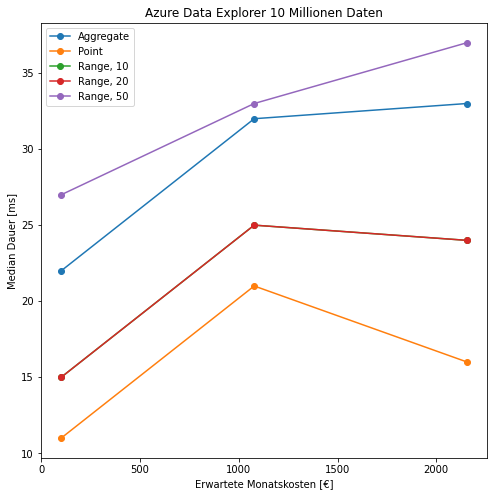

In [8]:
df_10Mil.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Erwartete Monatskosten [€]', ylabel='Median Dauer [ms]', figsize=(8,8),  title= 'Azure Data Explorer 10 Millionen Daten')
plt.savefig('./Plots/ADX_10Mil.png', bbox_inches='tight')

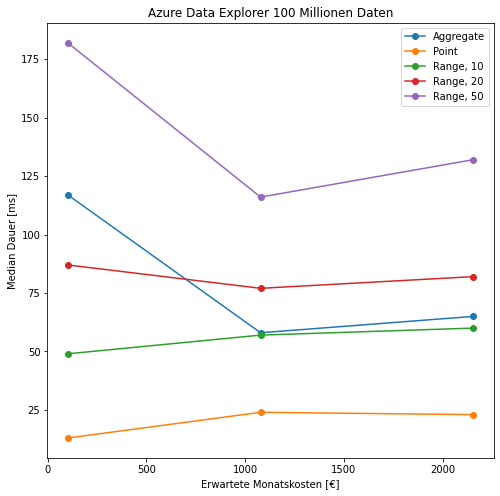

In [9]:
df_100Mil.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Erwartete Monatskosten [€]', ylabel='Median Dauer [ms]', figsize=(8,8), title= 'Azure Data Explorer 100 Millionen Daten')
plt.savefig('./Plots/ADX_100Mil.png', bbox_inches='tight')

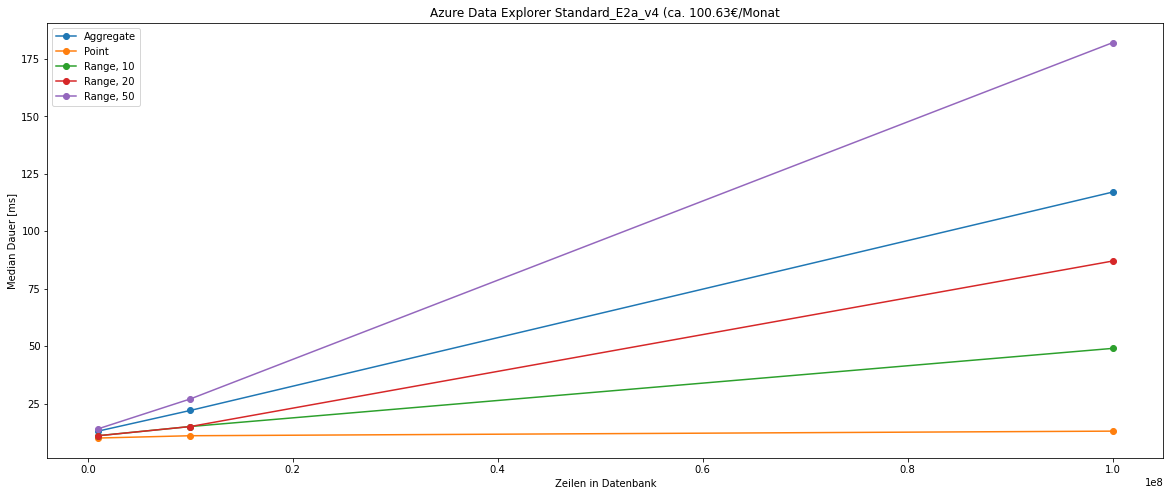

In [10]:
df_Standard_E2a_v4.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Zeilen in Datenbank', ylabel='Median Dauer [ms]', figsize=(20,8), title= 'Azure Data Explorer Standard_E2a_v4 (ca. 100.63€/Monat')
plt.savefig('./Plots/ADX_Standard_E2a_v4.png', bbox_inches='tight')

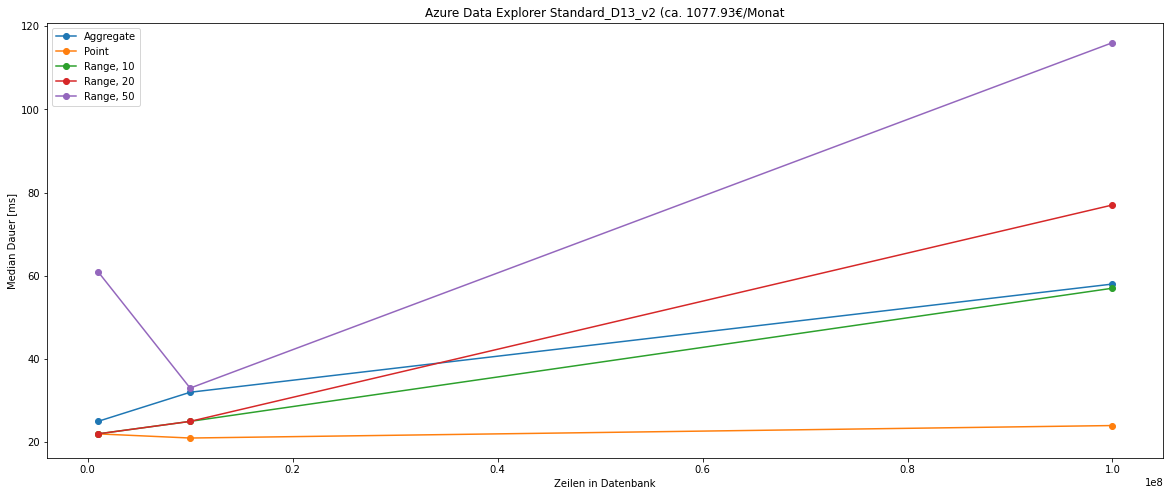

In [11]:
df_Standard_D13_v2.groupby('QueryType')['Median'].plot(marker='o',  legend=True,  xlabel='Zeilen in Datenbank', ylabel='Median Dauer [ms]', figsize=(20,8), title= 'Azure Data Explorer Standard_D13_v2 (ca. 1077.93€/Monat')
plt.savefig('./Plots/ADX_Standard_D13_v2.png', bbox_inches='tight')

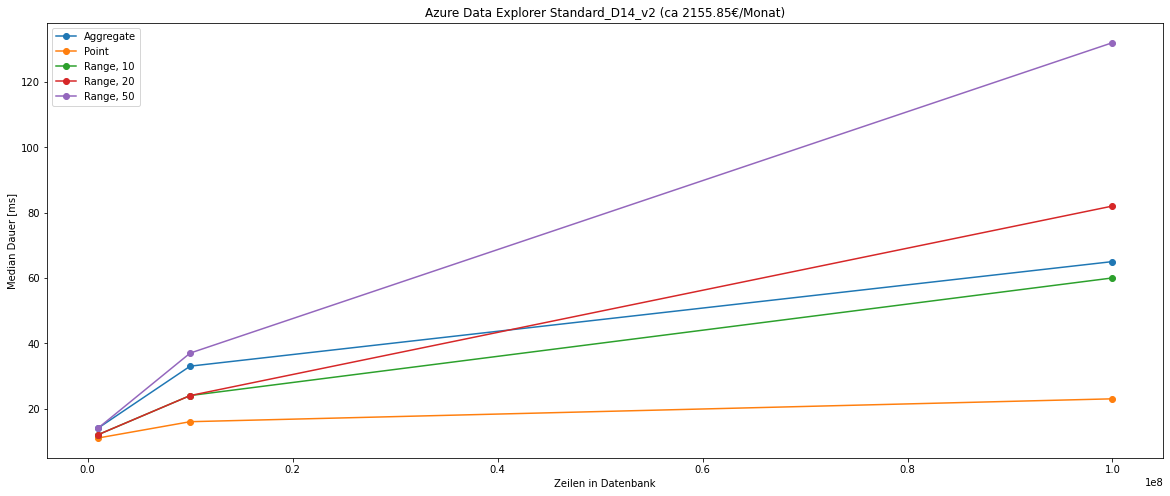

In [12]:
df_Standard_D14_v2.groupby('QueryType')['Median'].plot(marker='o',  legend=True,  xlabel='Zeilen in Datenbank', ylabel='Median Dauer [ms]', figsize=(20,8), title= 'Azure Data Explorer Standard_D14_v2 (ca 2155.85€/Monat)')
plt.savefig('./Plots/ADX_Standard_D14_v2.png', bbox_inches='tight')